# Cell which imports required modules

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.ion()
print('Imported and initialised matplotlib...')
import astropy.io.fits as ast
print('Imported Astropy...')
from MapFunc import *
print('Imported User Defined Functions...')
from tools.mapping import *
print("Imported Oliver King's tools, v1.4 ...")
col = 'viridis'
xcol = 'red'
lvls = 1000
print("Graphical Parameters initialised...")
print('All Modules Imported Successfully!')

Imported and initialised matplotlib...
Imported Astropy...
Imported User Defined Functions...
Imported Oliver King's tools, v1.4 ...
Graphical Parameters initialised...
All Modules Imported Successfully!


# Mapping F467M OPAL, Cycle 26
This cell maps a single image from the F467M OPAL 2019 dataset, as proof that the image works as intended

C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)


-70.00077410205762
323.0743
-393.0750741020576
.


C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:527: RuntimeWarning: invalid value encountered in remainder
  long_img = long_img % (2*np.pi)  # ensure values are in expected range


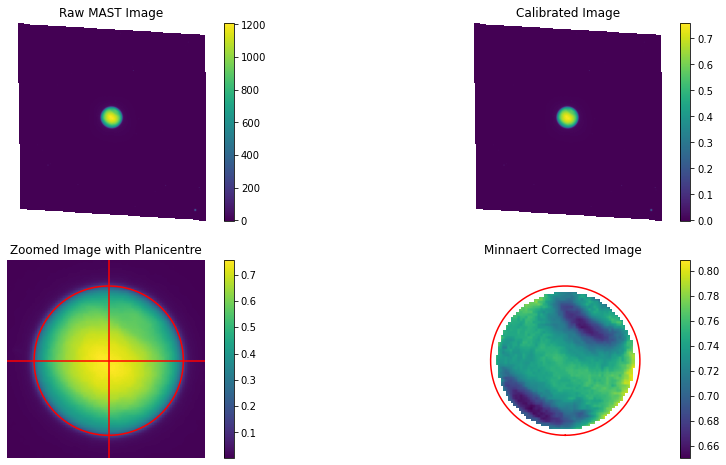

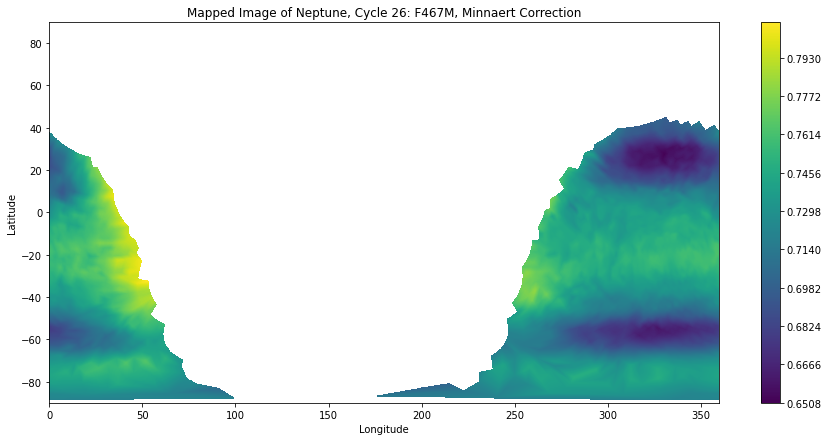

In [9]:
img, hdr, scihdr = open_img('data/test/467_1_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], 2019.04)

plt.figure(figsize=(15,8))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(222)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

ax3 = plt.subplot(223)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

img = minnaert(img, planicentre, 0.88, eph)

ax4 = plt.subplot(224)
im4 = ax4.imshow(img, cmap=col)
plt.title('Minnaert Corrected Image')
#ax4.axhline(planicentre[1],color=xcol)
#ax4.axvline(planicentre[0],color=xcol)
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang'])
print(float(scihdr['ORIENTAT']))
print(float(eph['NPole_ang']))
print(ang_corr)


mapped_img = map_observation(img, planicentre[0], planicentre[1], planicentre[2], ang_corr, eph['PDObsLon'], eph['PDObsLat'])

plt.figure(figsize=(15,7))
plt.contourf(mapped_img[1], mapped_img[2], mapped_img[0],levels=lvls)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mapped Image of Neptune, Cycle 26: F467M, Minnaert Correction')
plt.colorbar()
plt.show()

flipped_img = np.flip(mapped_img[0],0)

#plt.figure(figsize=(15,14))
#ax1 = plt.subplot(211)
#ax1.imshow(mapped_img[0])
#ax2 = plt.subplot(212)
#ax2.imshow(flipped_img)
#plt.show()

#Save the Plot to a File
plt.figure(figsize=(15,7)) #saves the map to a .png to possibly be used in my report
plt.contourf(mapped_img[1], mapped_img[2], mapped_img[0],levels=lvls)
plt.axis('off')
plt.savefig('maps/OPALCyc26/467_1_ang.png')
plt.close()

hdu = ast.PrimaryHDU(flipped_img) #saves the map to a fits image to be read by the reflectance plotter#
#hdu.writeto('maps/OPALCyc26/467_1.fits')

C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:527: RuntimeWarning: invalid value encountered in remainder
  long_img = long_img % (2*np.pi)  # ensure values are in expected range


-70.0007745095712
323.077
-393.0777745095712
.


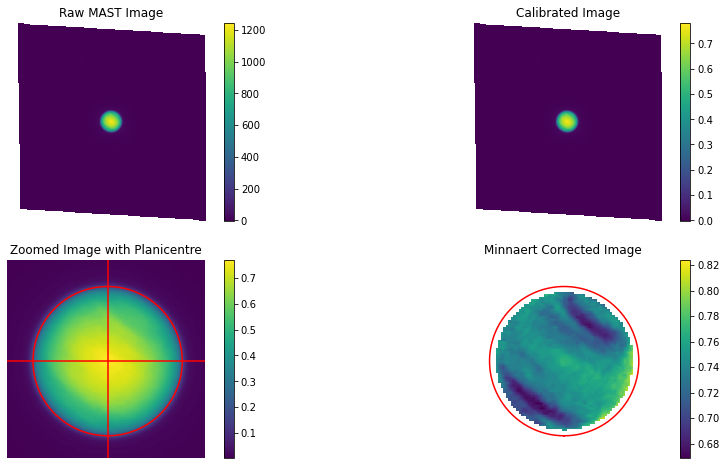

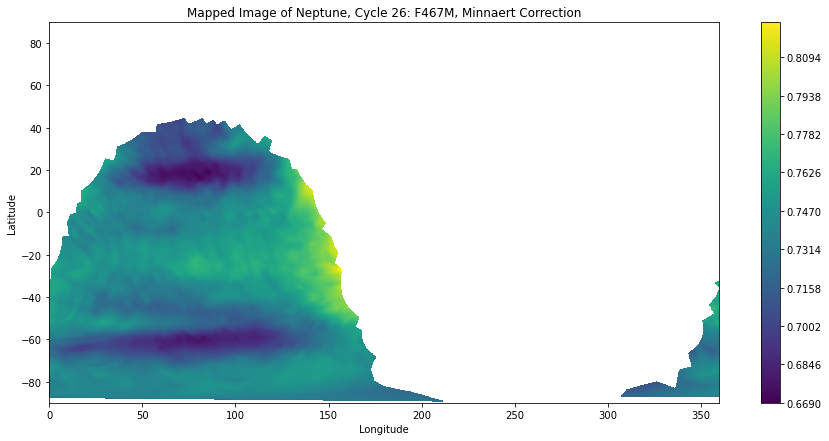

In [10]:
img, hdr, scihdr = open_img('data/test/467_2_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], 2019.04)

plt.figure(figsize=(15,8))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(222)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

ax3 = plt.subplot(223)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

img = minnaert(img, planicentre, 0.88, eph)

ax4 = plt.subplot(224)
im4 = ax4.imshow(img, cmap=col)
plt.title('Minnaert Corrected Image')
#ax4.axhline(planicentre[1],color=xcol)
#ax4.axvline(planicentre[0],color=xcol)
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang'])
print(float(scihdr['ORIENTAT']))
print(float(eph['NPole_ang']))
print(ang_corr)

mapped_img2 = map_observation(img, planicentre[0], planicentre[1], planicentre[2], ang_corr, eph['PDObsLon'], eph['PDObsLat'])

plt.figure(figsize=(15,7))
plt.contourf(mapped_img2[1], mapped_img2[2], mapped_img2[0],levels=lvls)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mapped Image of Neptune, Cycle 26: F467M, Minnaert Correction')
plt.colorbar()
plt.show()

flipped_img2 = np.flip(mapped_img2[0],0)

#plt.figure(figsize=(15,14))
#ax1 = plt.subplot(211)
#ax1.imshow(mapped_img[0])
#ax2 = plt.subplot(212)
#ax2.imshow(flipped_img)
#plt.show()

#Save the Plot to a File
plt.figure(figsize=(15,7)) #saves the map to a .png to possibly be used in my report
plt.contourf(mapped_img2[1], mapped_img2[2], mapped_img2[0],levels=lvls)
plt.axis('off')
plt.savefig('maps/OPALCyc26/467_2_ang.png')
plt.close()

hdu = ast.PrimaryHDU(flipped_img2) #saves the map to a fits image to be read by the reflectance plotter#
#hdu.writeto('maps/OPALCyc26/467_2.fits')

C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:527: RuntimeWarning: invalid value encountered in remainder
  long_img = long_img % (2*np.pi)  # ensure values are in expected range


-70.0007749164133
323.0797
-393.0804749164133
.


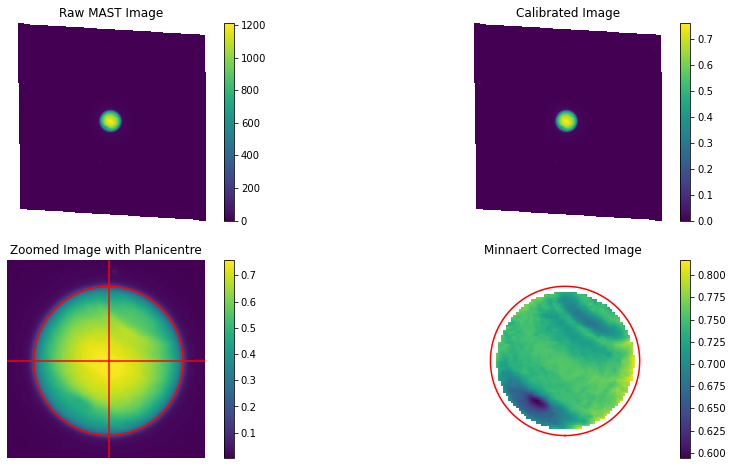

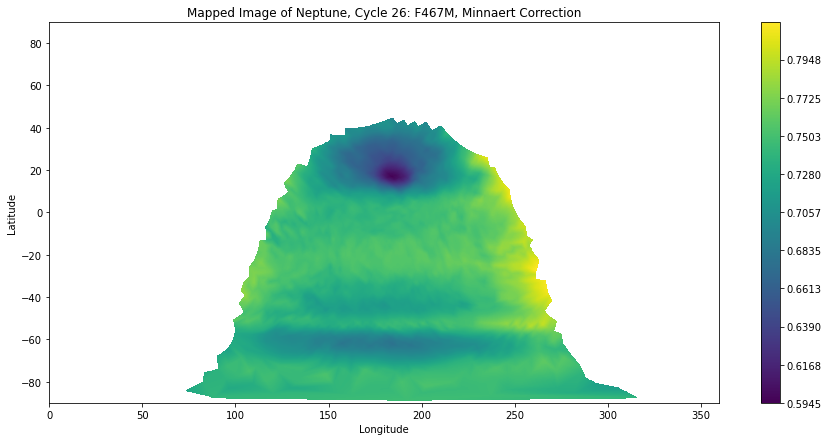

In [11]:
img, hdr, scihdr = open_img('data/test/467_3_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], 2019.04)

plt.figure(figsize=(15,8))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(222)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

ax3 = plt.subplot(223)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

img = minnaert(img, planicentre, 0.88, eph)

ax4 = plt.subplot(224)
im4 = ax4.imshow(img, cmap=col)
plt.title('Minnaert Corrected Image')
#ax4.axhline(planicentre[1],color=xcol)
#ax4.axvline(planicentre[0],color=xcol)
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang'])
print(float(scihdr['ORIENTAT']))
print(float(eph['NPole_ang']))
print(ang_corr)

mapped_img3 = map_observation(img, planicentre[0], planicentre[1], planicentre[2], ang_corr, eph['PDObsLon'], eph['PDObsLat'])

plt.figure(figsize=(15,7))
plt.contourf(mapped_img3[1], mapped_img3[2], mapped_img3[0],levels=lvls)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mapped Image of Neptune, Cycle 26: F467M, Minnaert Correction')
plt.colorbar()
plt.show()

flipped_img3 = np.flip(mapped_img3[0],0)

#plt.figure(figsize=(15,14))
#ax1 = plt.subplot(211)
#ax1.imshow(mapped_img[0])
#ax2 = plt.subplot(212)
#ax2.imshow(flipped_img)
#plt.show()

#Save the Plot to a File
plt.figure(figsize=(15,7)) #saves the map to a .png to possibly be used in my report
plt.contourf(mapped_img3[1], mapped_img3[2], mapped_img3[0],levels=lvls)
plt.axis('off')
plt.savefig('maps/OPALCyc26/467_3_ang.png')
plt.close()

hdu = ast.PrimaryHDU(flipped_img3) #saves the map to a fits image to be read by the reflectance plotter#
#hdu.writeto('maps/OPALCyc26/467_3.fits')

C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:527: RuntimeWarning: invalid value encountered in remainder
  long_img = long_img % (2*np.pi)  # ensure values are in expected range


-70.0007753225591
323.0825
-393.0832753225591
.


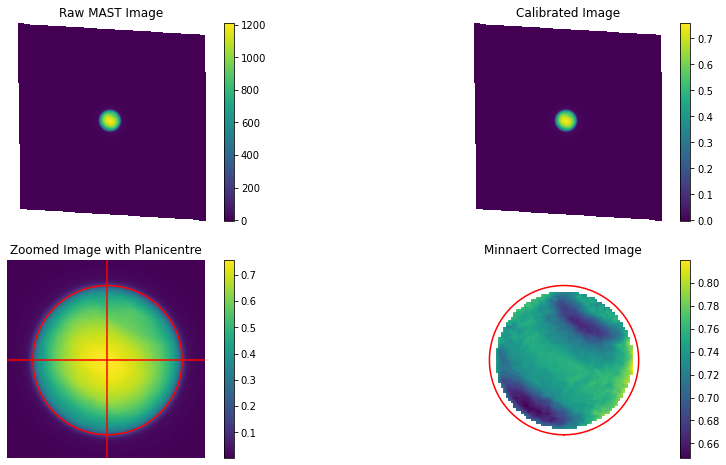

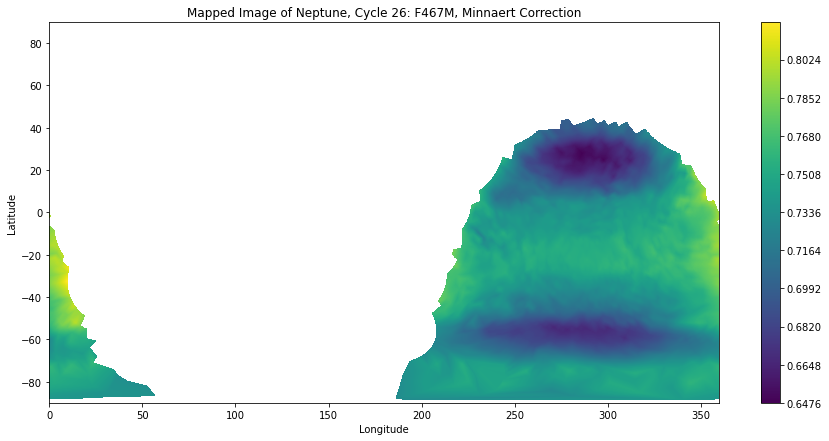

In [13]:
img, hdr, scihdr = open_img('data/test/467_4_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], 2019.04)

plt.figure(figsize=(15,8))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(222)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

ax3 = plt.subplot(223)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

img = minnaert(img, planicentre, 0.88, eph)

ax4 = plt.subplot(224)
im4 = ax4.imshow(img, cmap=col)
plt.title('Minnaert Corrected Image')
#ax4.axhline(planicentre[1],color=xcol)
#ax4.axvline(planicentre[0],color=xcol)
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang'])
print(float(scihdr['ORIENTAT']))
print(float(eph['NPole_ang']))
print(ang_corr)

mapped_img4 = map_observation(img, planicentre[0], planicentre[1], planicentre[2], ang_corr, eph['PDObsLon'], eph['PDObsLat'])

plt.figure(figsize=(15,7))
plt.contourf(mapped_img4[1], mapped_img4[2], mapped_img4[0],levels=lvls)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mapped Image of Neptune, Cycle 26: F467M, Minnaert Correction')
plt.colorbar()
plt.show()

flipped_img4 = np.flip(mapped_img4[0],0)

#plt.figure(figsize=(15,14))
#ax1 = plt.subplot(211)
#ax1.imshow(mapped_img[0])
#ax2 = plt.subplot(212)
#ax2.imshow(flipped_img)
#plt.show()

#Save the Plot to a File
plt.figure(figsize=(15,7)) #saves the map to a .png to possibly be used in my report
plt.contourf(mapped_img4[1], mapped_img4[2], mapped_img4[0],levels=lvls)
plt.axis('off')
plt.savefig('maps/OPALCyc26/467_4_ang.png')
plt.close()

hdu = ast.PrimaryHDU(flipped_img4) #saves the map to a fits image to be read by the reflectance plotter#
#hdu.writeto('maps/OPALCyc26/467_4.fits')

In [ ]:
plt.figure(figsize=(15,7))
plt.contourf(mapped_img[1], mapped_img[2], mapped_img[0],levels=lvls)
plt.contourf(mapped_img2[1], mapped_img2[2], mapped_img2[0],levels=lvls)
plt.contourf(mapped_img3[1], mapped_img3[2], mapped_img3[0],levels=lvls)
plt.contourf(mapped_img4[1], mapped_img4[2], mapped_img4[0],levels=lvls)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mapped Image of Neptune, Cycle 26: F467M, Minnaert Correction')
plt.colorbar()
plt.show()

# Runs other filters through mapping

C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:527: RuntimeWarning: invalid value encountered in remainder
  long_img = long_img % (2*np.pi)  # ensure values are in expected range


-70.00077410441003
323.0742
-393.07497410441005
.


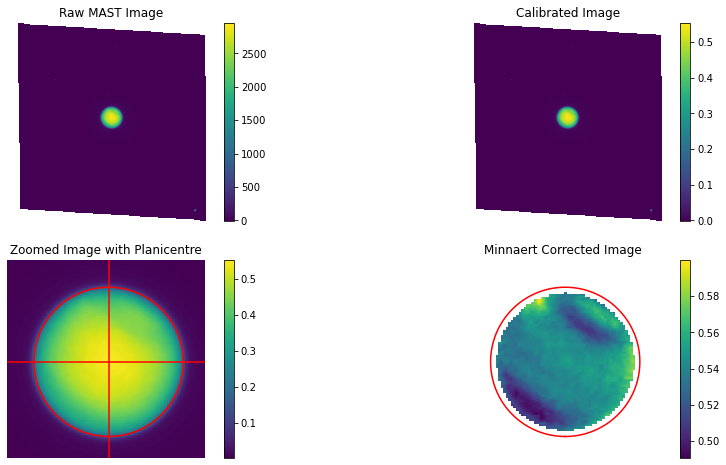

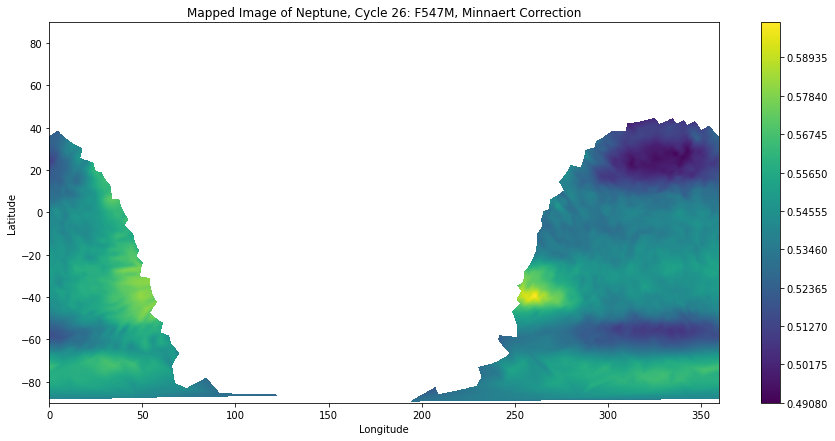

In [14]:
img, hdr, scihdr = open_img('data/test/547_1_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], 1859.82)

plt.figure(figsize=(15,8))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(222)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

ax3 = plt.subplot(223)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

img = minnaert(img, planicentre, 0.8, eph)

ax4 = plt.subplot(224)
im4 = ax4.imshow(img, cmap=col)
plt.title('Minnaert Corrected Image')
#ax4.axhline(planicentre[1],color=xcol)
#ax4.axvline(planicentre[0],color=xcol)
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang'])
print(float(scihdr['ORIENTAT']))
print(float(eph['NPole_ang']))
print(ang_corr)

mapped_img = map_observation(img, planicentre[0], planicentre[1], planicentre[2], ang_corr, eph['PDObsLon'], eph['PDObsLat'])

plt.figure(figsize=(15,7))
plt.contourf(mapped_img[1], mapped_img[2], mapped_img[0],levels=lvls)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mapped Image of Neptune, Cycle 26: F547M, Minnaert Correction')
plt.colorbar()
plt.show()

flipped_img = np.flip(mapped_img[0],0)

#Save the Plot to a File
plt.figure(figsize=(15,7)) #saves the map to a .png to possibly be used in my report
plt.contourf(mapped_img[1], mapped_img[2], mapped_img[0],levels=lvls)
plt.axis('off')
plt.savefig('maps/OPALCyc26/547_1.png')
plt.close()

hdu = ast.PrimaryHDU(flipped_img) #saves the map to a fits image to be read by the reflectance plotter#
#hdu.writeto('maps/OPALCyc26/547_1.fits')

C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:527: RuntimeWarning: invalid value encountered in remainder
  long_img = long_img % (2*np.pi)  # ensure values are in expected range


-69.99930040830532
323.0748
-393.0741004083053
.


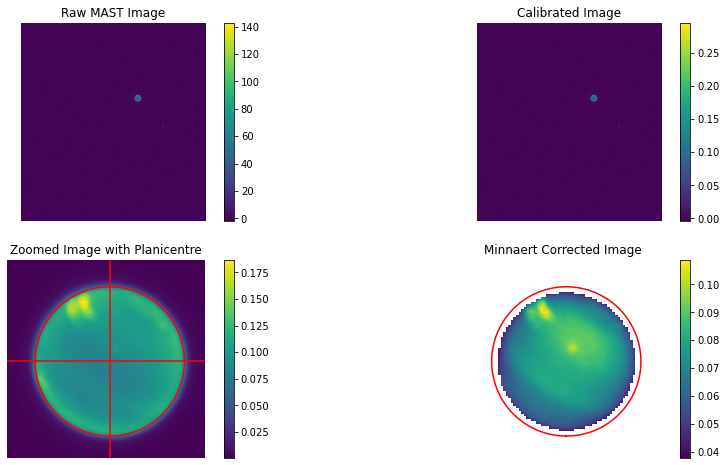

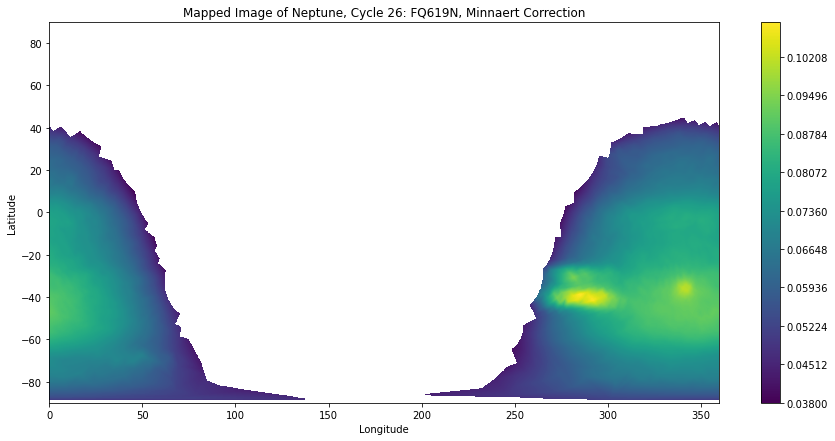

In [16]:
img, hdr, scihdr = open_img('data/test/619_1_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

#filter bad pixels
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)

plt.figure(figsize=(15,8))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], 1707.85)

img = img*IF

ax2 = plt.subplot(222)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

ax3 = plt.subplot(223)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

img = minnaert(img, planicentre, 0, eph)

ax4 = plt.subplot(224)
im4 = ax4.imshow(img, cmap=col)
plt.title('Minnaert Corrected Image')
#ax4.axhline(planicentre[1],color=xcol)
#ax4.axvline(planicentre[0],color=xcol)
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang'])
print(float(scihdr['ORIENTAT']))
print(float(eph['NPole_ang']))
print(ang_corr)

mapped_img = map_observation(img, planicentre[0], planicentre[1], planicentre[2], ang_corr, eph['PDObsLon'], eph['PDObsLat'])

plt.figure(figsize=(15,7))
plt.contourf(mapped_img[1], mapped_img[2], mapped_img[0],levels=lvls)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mapped Image of Neptune, Cycle 26: FQ619N, Minnaert Correction')
plt.colorbar()
plt.show()

flipped_img = np.flip(mapped_img[0],0)

#Save the Plot to a File
plt.figure(figsize=(15,7)) #saves the map to a .png to possibly be used in my report
plt.contourf(mapped_img[1], mapped_img[2], mapped_img[0],levels=lvls)
plt.axis('off')
plt.savefig('maps/OPALCyc26/619_1.png')
plt.close()

hdu = ast.PrimaryHDU(flipped_img) #saves the map to a fits image to be read by the reflectance plotter#
#hdu.writeto('maps/OPALCyc26/619_1.fits')

C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:527: RuntimeWarning: invalid value encountered in remainder
  long_img = long_img % (2*np.pi)  # ensure values are in expected range


-70.00077410654856
323.0742
-393.07497410654855
.


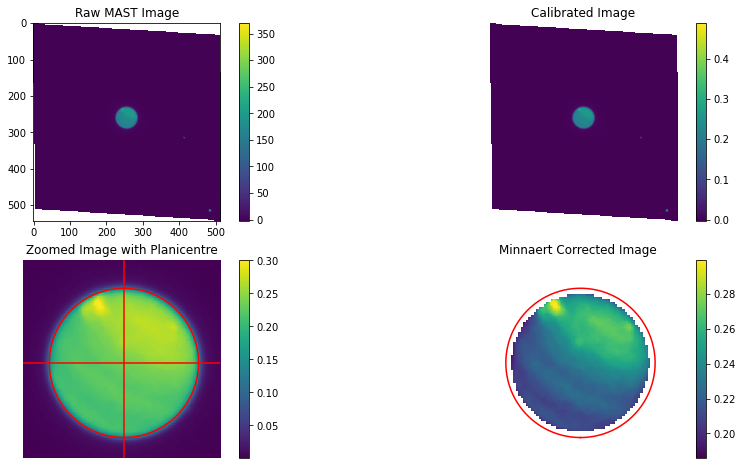

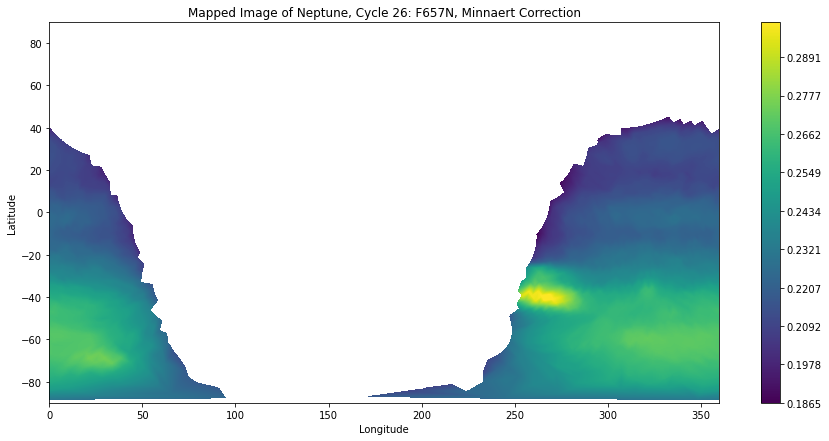

In [17]:
img, hdr, scihdr = open_img('data/test/657_1_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

plt.figure(figsize=(15,8))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
#ax1.axis('off')

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], 1238.00)

img = img*IF

ax2 = plt.subplot(222)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

ax3 = plt.subplot(223)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

img = minnaert(img, planicentre, 0.5, eph)

ax4 = plt.subplot(224)
im4 = ax4.imshow(img, cmap=col)
plt.title('Minnaert Corrected Image')
#ax4.axhline(planicentre[1],color=xcol)
#ax4.axvline(planicentre[0],color=xcol)
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang'])
print(float(scihdr['ORIENTAT']))
print(float(eph['NPole_ang']))
print(ang_corr)

mapped_img = map_observation(img, planicentre[0], planicentre[1], planicentre[2], ang_corr, eph['PDObsLon'], eph['PDObsLat'])

plt.figure(figsize=(15,7))
plt.contourf(mapped_img[1], mapped_img[2], mapped_img[0],levels=lvls)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mapped Image of Neptune, Cycle 26: F657N, Minnaert Correction')
plt.colorbar()
plt.show()

flipped_img = np.flip(mapped_img[0],0)

#Save the Plot to a File
plt.figure(figsize=(15,7)) #saves the map to a .png to possibly be used in my report
plt.contourf(mapped_img[1], mapped_img[2], mapped_img[0],levels=lvls)
plt.axis('off')
plt.savefig('maps/OPALCyc26/657_1.png')
plt.close()

hdu = ast.PrimaryHDU(flipped_img) #saves the map to a fits image to be read by the reflectance plotter#
#hdu.writeto('maps/OPALCyc26/657_1.fits')

C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:527: RuntimeWarning: invalid value encountered in remainder
  long_img = long_img % (2*np.pi)  # ensure values are in expected range


-70.00057736151462
323.0745
-393.0750773615146
.


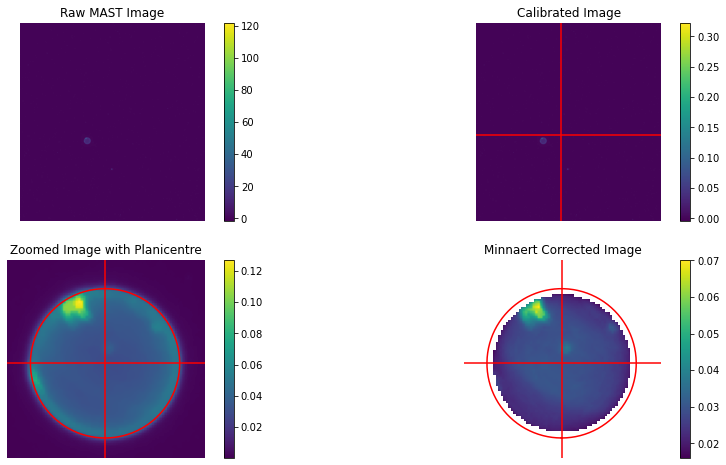

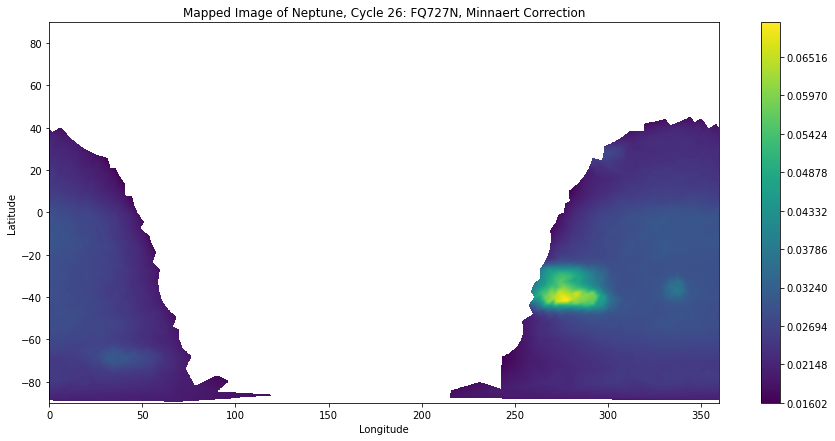

In [18]:
img, hdr, scihdr = open_img('data/test/727_1_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

#filter bad pixels
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)

plt.figure(figsize=(15,8))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], 1339.23)

img = img*IF

ax2 = plt.subplot(222)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
ax2.axhline(1013.51064914,color=xcol)
ax2.axvline(760.84945256,color=xcol)
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,2,500)

ax3 = plt.subplot(223)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

img = minnaert(img, planicentre, 0, eph)

ax4 = plt.subplot(224)
im4 = ax4.imshow(img, cmap=col)
plt.title('Minnaert Corrected Image')
ax4.axhline(planicentre[1],color=xcol)
ax4.axvline(planicentre[0],color=xcol)
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang'])
print(float(scihdr['ORIENTAT']))
print(float(eph['NPole_ang']))
print(ang_corr)

mapped_img = map_observation(img, planicentre[0], planicentre[1], planicentre[2], ang_corr, eph['PDObsLon'], eph['PDObsLat'])

plt.figure(figsize=(15,7))
plt.contourf(mapped_img[1], mapped_img[2], mapped_img[0],levels=lvls)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mapped Image of Neptune, Cycle 26: FQ727N, Minnaert Correction')
plt.colorbar()
plt.show()

flipped_img = np.flip(mapped_img[0],0)

#Save the Plot to a File
plt.figure(figsize=(15,7)) #saves the map to a .png to possibly be used in my report
plt.contourf(mapped_img[1], mapped_img[2], mapped_img[0],levels=lvls)
plt.axis('off')
plt.savefig('maps/OPALCyc26/727_1.png')
plt.close()

hdu = ast.PrimaryHDU(flipped_img) #saves the map to a fits image to be read by the reflectance plotter#
#hdu.writeto('maps/OPALCyc26/727_1.fits')

C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:527: RuntimeWarning: invalid value encountered in remainder
  long_img = long_img % (2*np.pi)  # ensure values are in expected range


-70.00077410574391
323.0742
-393.07497410574393
.


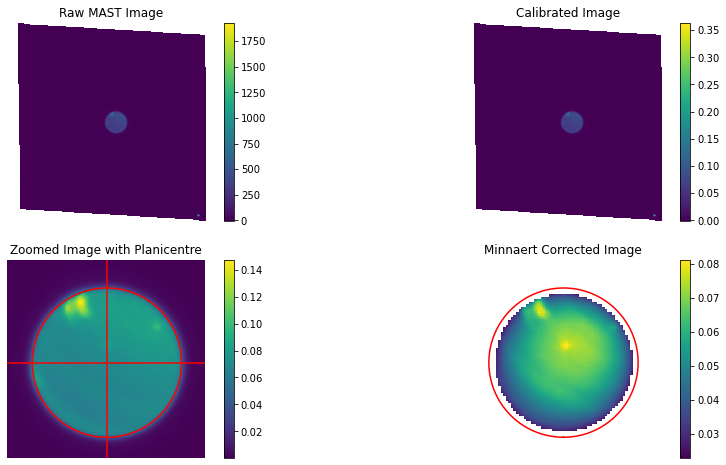

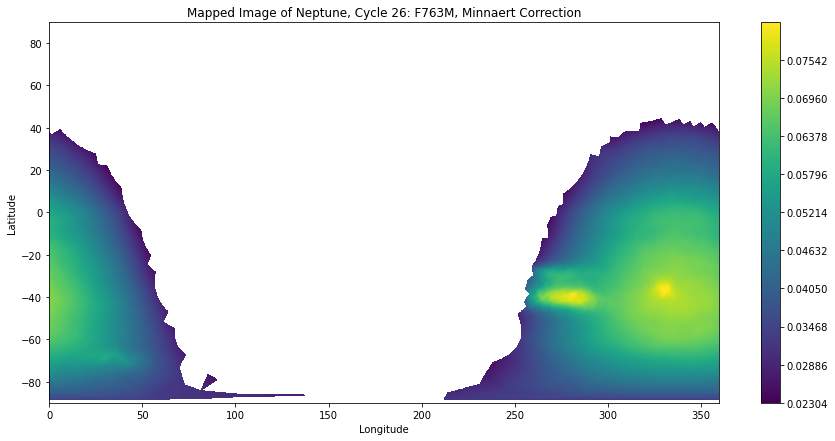

In [19]:
img, hdr, scihdr = open_img('data/test/763_1_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

plt.figure(figsize=(15,8))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], 1541.91)

img = img*IF

ax2 = plt.subplot(222)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

ax3 = plt.subplot(223)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

img = minnaert(img, planicentre, 0, eph)

ax4 = plt.subplot(224)
im4 = ax4.imshow(img, cmap=col)
plt.title('Minnaert Corrected Image')
#ax4.axhline(planicentre[1],color=xcol)
#ax4.axvline(planicentre[0],color=xcol)
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang'])
print(float(scihdr['ORIENTAT']))
print(float(eph['NPole_ang']))
print(ang_corr)

mapped_img = map_observation(img, planicentre[0], planicentre[1], planicentre[2], ang_corr, eph['PDObsLon'], eph['PDObsLat'])

plt.figure(figsize=(15,7))
plt.contourf(mapped_img[1], mapped_img[2], mapped_img[0],levels=lvls)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mapped Image of Neptune, Cycle 26: F763M, Minnaert Correction')
plt.colorbar()
plt.show()

flipped_img = np.flip(mapped_img[0],0)

#Save the Plot to a File
plt.figure(figsize=(15,7)) #saves the map to a .png to possibly be used in my report
plt.contourf(mapped_img[1], mapped_img[2], mapped_img[0],levels=lvls)
plt.axis('off')
plt.savefig('maps/OPALCyc26/763_1.png')
plt.close()

hdu = ast.PrimaryHDU(flipped_img) #saves the map to a fits image to be read by the reflectance plotter#
#hdu.writeto('maps/OPALCyc26/763_1.fits')

C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:527: RuntimeWarning: invalid value encountered in remainder
  long_img = long_img % (2*np.pi)  # ensure values are in expected range


-70.00077409896856
323.0743
-393.07507409896857
.


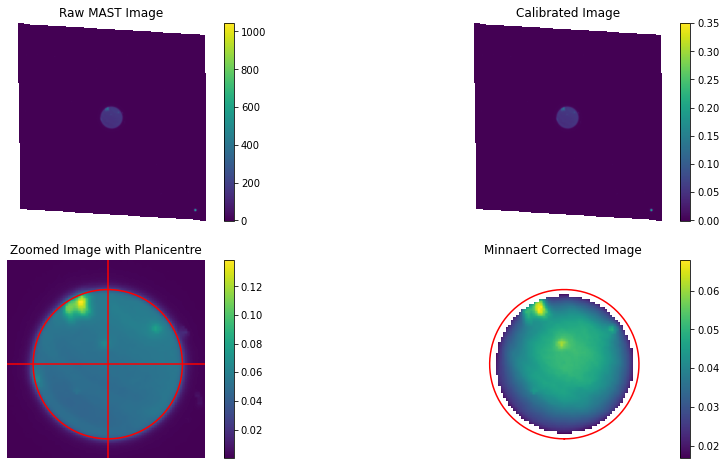

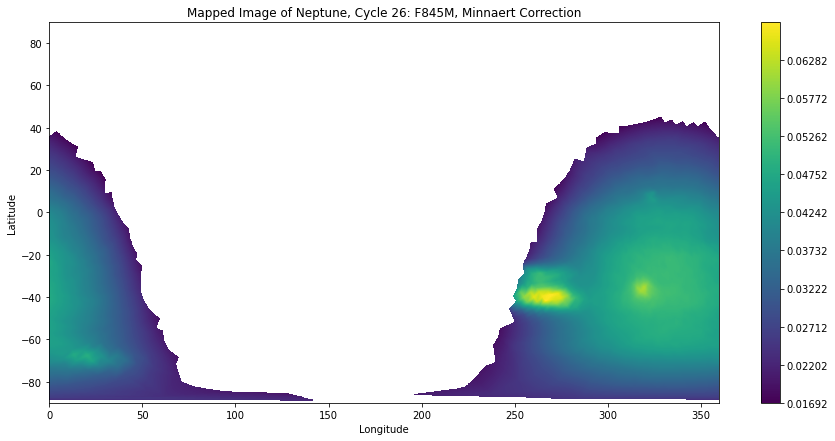

In [20]:
img, hdr, scihdr = open_img('data/test/845_1_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

plt.figure(figsize=(15,8))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], 1023.65)

img = img*IF

ax2 = plt.subplot(222)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)

ax3 = plt.subplot(223)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

img = minnaert(img, planicentre, 0, eph)

ax4 = plt.subplot(224)
im4 = ax4.imshow(img, cmap=col)
plt.title('Minnaert Corrected Image')
#ax4.axhline(planicentre[1],color=xcol)
#ax4.axvline(planicentre[0],color=xcol)
ax4.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im4)
ax4.axis('off')

ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang'])
print(float(scihdr['ORIENTAT']))
print(float(eph['NPole_ang']))
print(ang_corr)

mapped_img = map_observation(img, planicentre[0], planicentre[1], planicentre[2], ang_corr, eph['PDObsLon'], eph['PDObsLat'])

plt.figure(figsize=(15,7))
plt.contourf(mapped_img[1], mapped_img[2], mapped_img[0],levels=lvls)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mapped Image of Neptune, Cycle 26: F845M, Minnaert Correction')
plt.colorbar()
plt.show()

flipped_img = np.flip(mapped_img[0],0)

#Save the Plot to a File
plt.figure(figsize=(15,7)) #saves the map to a .png to possibly be used in my report
plt.contourf(mapped_img[1], mapped_img[2], mapped_img[0],levels=lvls)
plt.axis('off')
plt.savefig('maps/OPALCyc26/845_1.png')
plt.close()

hdu = ast.PrimaryHDU(flipped_img) #saves the map to a fits image to be read by the reflectance plotter#
#hdu.writeto('maps/OPALCyc26/845_1.fits')